In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import re
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
from nrclex import NRCLex

In [2]:
#api_key = "xxx"
#api_secret_key = "xxx"
#access_token = "xxx"
#access_token_secret = "xxx"
#auth = tweepy.OAuthHandler(api_key, api_secret_key)
#auth.set_access_token(access_token, access_token_secret)
#api = tweepy.API(auth)

In [3]:
#tweets = tweepy.Cursor(api.search_tweets, 
 #                      q= 'mashiho yedam -filter:retweets since:2022-11-08',
  #                     lang="en").items(1000)

#list1 = [[tweet.text, tweet.created_at, 
 #         tweet.user.screen_name, tweet.user.location] for tweet in tweets]

In [4]:
#df = pd.DataFrame(data=list1, 
 #                 columns=['tweets', 'date', 'user', "location"])
#df.drop_duplicates('tweets', keep = 'first', inplace=True)
#df.info()
#df.to_csv('mashidam_sentiment2.csv')

In [5]:
df = pd.read_csv('mashidam_sentiment2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  938 non-null    int64 
 1   tweets      938 non-null    object
 2   date        938 non-null    object
 3   user        938 non-null    object
 4   location    591 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.8+ KB


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  938 non-null    int64 
 1   tweets      938 non-null    object
 2   date        938 non-null    object
 3   user        938 non-null    object
 4   location    591 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.8+ KB


In [7]:
def clean_tweet(tweet):
    r = tweet.lower()
    r = re.sub("'", "", r) 
    r = re.sub("@[A-Za-z0-9_]+","", r)
    r = re.sub("#[A-Za-z0-9_]+","", r)
    r = re.sub(r'http\S+', '', r)
    r = re.sub('[()!?]', ' ', r)
    r = re.sub('\[.*?\]',' ', r)
    r = re.sub("[^a-z0-9]"," ", r)
    r = r.split()
    stopwords = ["for", "on", "an", "a", "of", "and", "in", 
                 "the", "to", "from", "amp", "wts","lfb", 
                 "photocard", "lsf", "price", "11 11", "php", 
                 "photocards", "ph", "this", "ina", "freeong", 
                 "payo", "pc", "pcs", "t", "even", "m", "s", "u" 
                 "good", "condi", "want", "sell", "stlh", "shopee",
                 "packing", "aman", "blh", "ea", "i", "you","all", 
                 "our", "is", "we", "will", "that", "so", "my", 
                 "im", "be", "but", "are", "it", "ill", "guys"]
    r = [w for w in r if not w in stopwords]
    r = " ".join(word for word in r)
    return r

In [8]:
tweet_list = df.tweets.to_list()
cleaned = [clean_tweet(tw) for tw in tweet_list]

In [9]:
cleaned = [clean_tweet(tw) for tw in tweet_list]

In [10]:
sentiment = [TextBlob(tweet) for tweet in cleaned]
sentiment_values = [[str(tweet), tweet.sentiment.subjectivity, 
                     tweet.sentiment.polarity] 
                    for tweet in sentiment]
sentiment_df = pd.DataFrame(sentiment_values, 
                            columns=["tweet", "subjectivity", 
                                     "polarity"])

sentiment_df

,tweet,subjectivity,polarity
0,treasure 12 memory lane logo highlights inclus...,1.000000,0.500000
1,missing mashiho yedam more at hour,0.275000,0.150000
2,lets not normalize missing waiting ur comeback...,0.516667,0.366667
3,miss mashiho bang yedam,0.000000,0.000000
4,me every treasure song tomorrow knowing ll not...,0.000000,0.000000
...,...,...,...
933,wtf just realized heard mashiho yedam left tre...,0.480000,-0.280000
934,wishing best aces mashiho yedam,0.300000,1.000000
935,blackswans mashmellows wishing best aces mashi...,0.300000,1.000000
936,wishing best aces mashiho yedam,0.300000,1.000000


In [11]:
def analysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
sentiment_df['analysis'] = sentiment_df['polarity'].apply(analysis)

In [12]:
analysis_counts = sentiment_df['analysis'].value_counts()
analysis_counts

Positive    470
Neutral     342
Negative    126
Name: analysis, dtype: int64


 Positive    470
Neutral     342
Negative    126
Name: analysis, dtype: int64


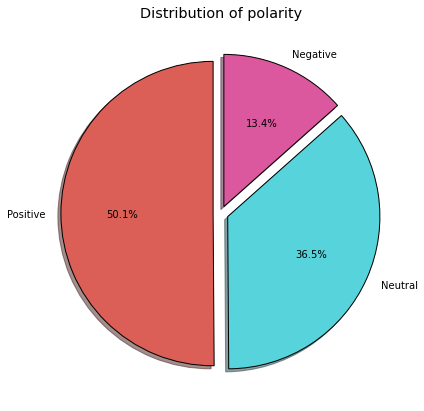

In [13]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(7,7))
my_cmap = ListedColormap(sns.hls_palette(10).as_hex())

wp={'linewidth':1, 'edgecolor': 'black'}
explode = (0.05,0.05,0.05)
analysis_counts.plot(kind='pie', autopct='%1.1f%%', cmap=my_cmap,
                     label = '', wedgeprops=wp, explode=explode,
                     startangle=90, shadow=True)
plt.title('Distribution of polarity')
print('\n',analysis_counts)

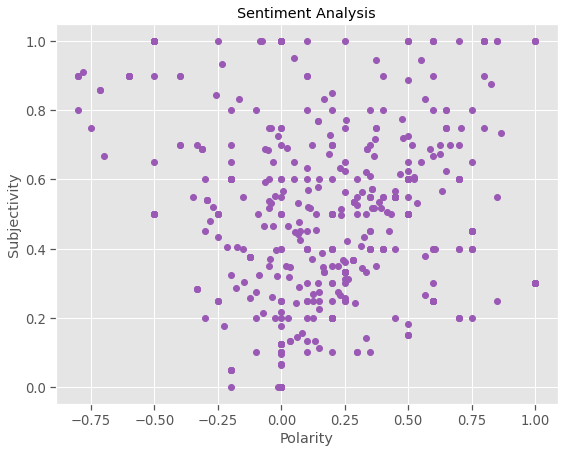

In [27]:
#plot the polarity and subjectivity on a scatter plot

plt.figure(figsize=(9,7))
plt.scatter(sentiment_df['polarity'], sentiment_df['subjectivity'], color = '#9b59b6')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 194 # 0 - 360
    s = 83 # 0 - 100
    l = random_state.randint(30, 50) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)
def similar_color_func2(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 8 # 0 - 360
    s = 100 # 0 - 100
    l = random_state.randint(40, 60) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

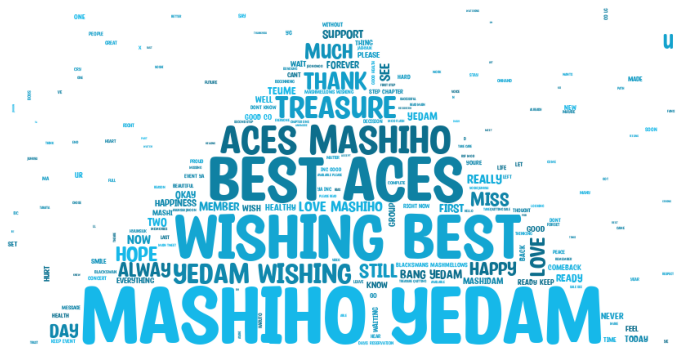

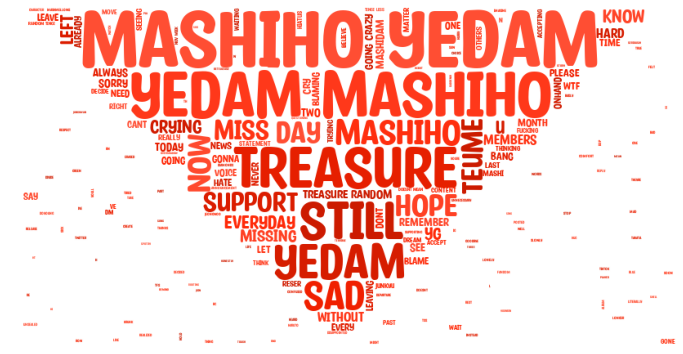

In [16]:
#create a function for wordcloud
font = "C:/Users/yemim/sentiment analysis/Party Confetti.ttf"
from PIL import Image
def create_wordcloud(text, mask1,f,c):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white',  width=800, height=500, random_state=21, max_font_size=256, mask=mask1, color_func = c, font_path=font).generate(allWords)
    plt.figure(figsize=(12,8))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.savefig(f)
    plt.show()
#wordcloud for positive tweets
m1=np.array(Image.open("C:/Users/yemim/sentiment analysis//image.jpg"))
m2=np.array(Image.open("C:/Users/yemim/sentiment analysis/dmb (1).jpg"))
posTweets = sentiment_df.loc[sentiment_df['analysis']=='Positive', 'tweet']
create_wordcloud(posTweets, m1,"f1.jpg", similar_color_func)
#wordcloud for negative tweets
negTweets = sentiment_df.loc[sentiment_df['analysis']=='Negative', 'tweet']
create_wordcloud(negTweets,m2, "f2.jpg", similar_color_func2)

In [17]:
sentences = []
for word in cleaned:
    sentences.append(word)
lines = []
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10] 

#shows first 10 words in the first tweet

['treasure',
 '12',
 'memory',
 'lane',
 'logo',
 'highlights',
 'inclusion',
 'still',
 'precious',
 'gems']

In [18]:
wc = pd.DataFrame(lines)
wc = wc[0].value_counts()
 #shows the new dataframe

C:\Users\yemim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


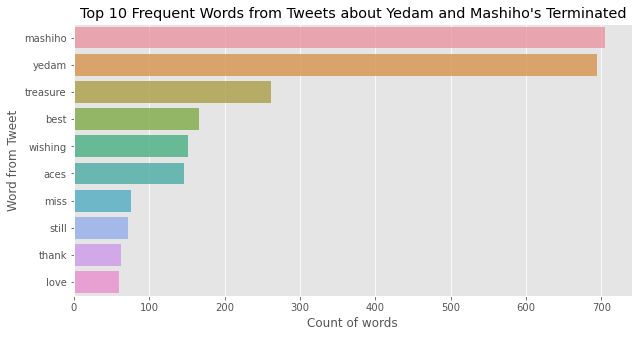

In [19]:
wc = wc[:10]
plt.figure(figsize=(10,5))
sns.barplot(wc.values, wc.index, alpha=0.8)
plt.title('Top 10 Frequent Words from Tweets about Yedam and Mashiho\'s Terminated')
plt.xlabel('Count of words', fontsize=12)
plt.ylabel('Word from Tweet', fontsize=12)
plt.show()


In [20]:
def emo_tweet(word):
    word = str([cell.encode('utf-8') for cell in word])# to convert the text into utf-8 unicode
    str_text = NRCLex(word) 
    str_text = str_text.raw_emotion_scores
    str_text = pd.DataFrame(str_text,index=[0])
    str_text = pd.melt(str_text)
    str_text.columns = ('Emotions','Count')
    str_text = str_text.sort_values('Count', ascending=False)
    return str_text

In [43]:
emo = emo_tweet(cleaned)
filt = ['positive', 'negative']

emo = emo.drop(emo.index[[0,4]])

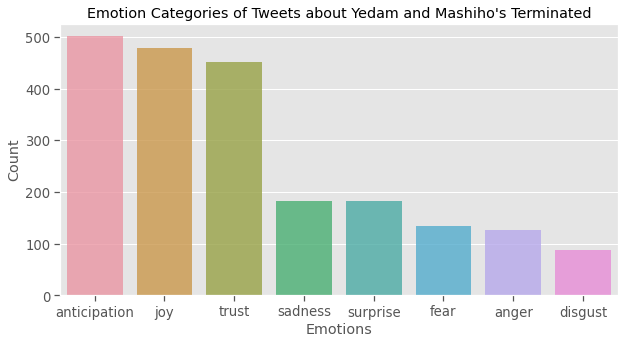

In [45]:
plt.figure(figsize=(10,5))
plt.title('Emotion Categories of Tweets about Yedam and Mashiho\'s Terminated')
sns.set_context(context='notebook',font_scale=1.2)
sns.barplot(y='Count',x='Emotions',data=emo, orient='v', alpha=0.8);